<a href="https://colab.research.google.com/github/hvr2026/Decision-trees/blob/main/GBM%20method/GBM_Classifier_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catboost
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [29]:
!pip install --upgrade xgboost

In [4]:
!pip install "dask[dataframe]"

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 7.5 MB/s eta 0:00:00


In [39]:
import catboost

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve, mean_squared_error, r2_score
)
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load the dataset
diabetes_data = pd.read_csv('/content/diabetes.csv')


In [8]:
# Inspect the data
print("Dataset shape:", diabetes_data.shape)
print("First few rows of the dataset:")
display(diabetes_data.head())

Dataset shape: (15000, 10)
First few rows of the dataset:


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [9]:
# Separate features and target
X = diabetes_data.drop(columns=["PatientID", "Diabetic"])
y = diabetes_data["Diabetic"]


In [10]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [12]:
# Function to evaluate classifier models
def evaluate_classifier(model, model_name):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f} (CV Mean: {scores.mean():.2f})")
    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"{model_name} AUC-ROC: {roc_auc:.2f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
        plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{model_name} ROC Curve")
        plt.legend()
        plt.grid()
        plt.show()

In [13]:
# Showcase GBM Classifier Techniques
classifiers = [
    (XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42), "XGBoost Classifier"),
    (CatBoostClassifier(verbose=0, random_seed=42), "CatBoost Classifier"),
    (LGBMClassifier(random_state=42), "LightGBM Classifier"),
    (RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42), "Random Forest Classifier"),
    (AdaBoostClassifier(n_estimators=50, random_state=42), "AdaBoost Classifier"),
    (DecisionTreeClassifier(max_depth=5, random_state=42), "Decision Tree Classifier")
]

Classifier Techniques:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:14:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Classifier Accuracy: 0.95 (CV Mean: 0.96)
XGBoost Classifier AUC-ROC: 0.99


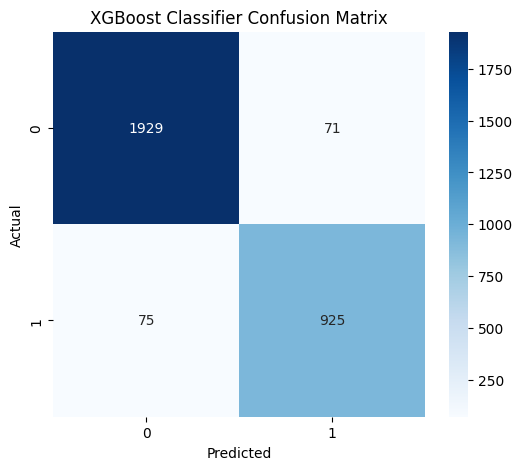

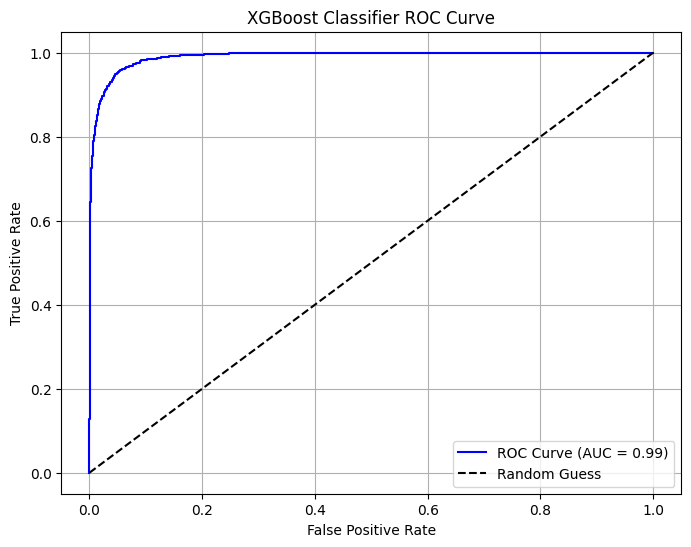

CatBoost Classifier Accuracy: 0.95 (CV Mean: 0.96)
CatBoost Classifier AUC-ROC: 0.99


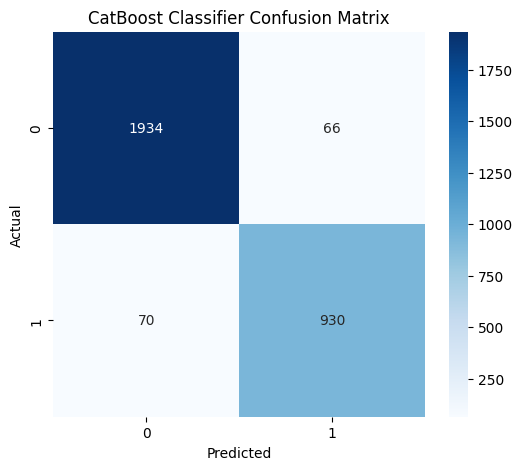

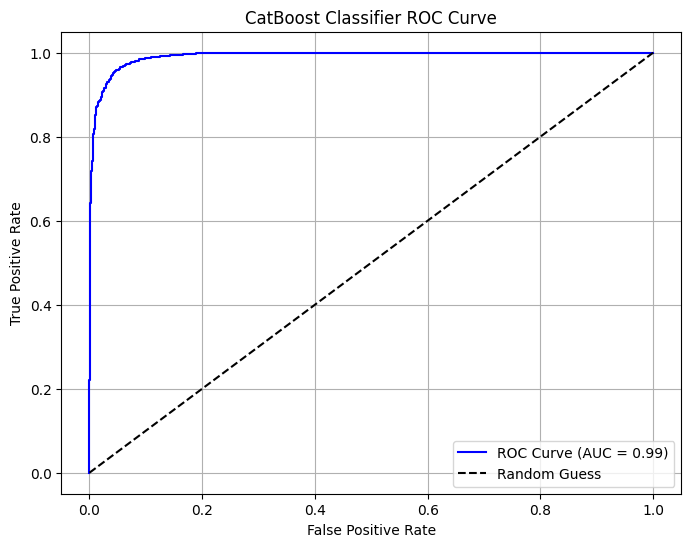

[LightGBM] [Info] Number of positive: 3200, number of negative: 6400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1141
[LightGBM] [Info] Number of data points in the train set: 9600, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Number of positive: 3200, number of negative: 6400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1140
[LightGBM] [Info] Number of data points in the train set: 9600, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Nu

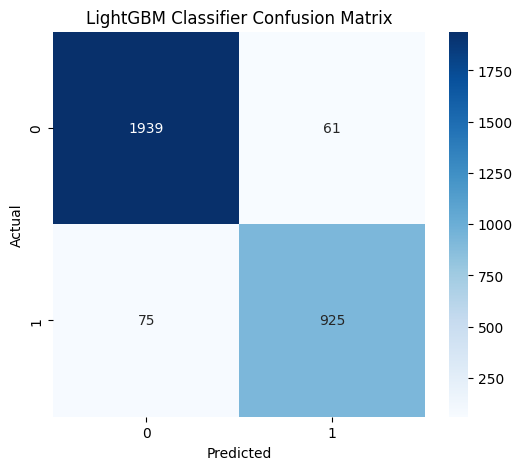

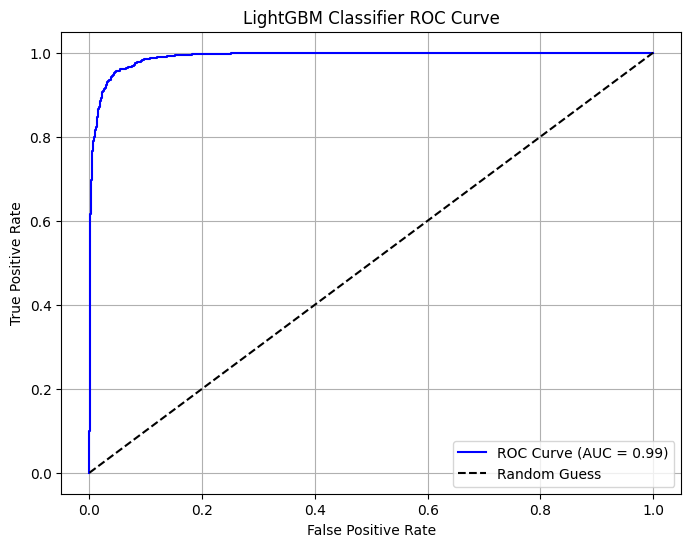

Random Forest Classifier Accuracy: 0.93 (CV Mean: 0.93)
Random Forest Classifier AUC-ROC: 0.98


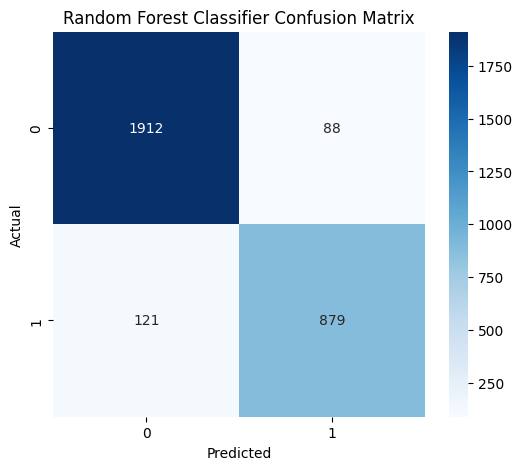

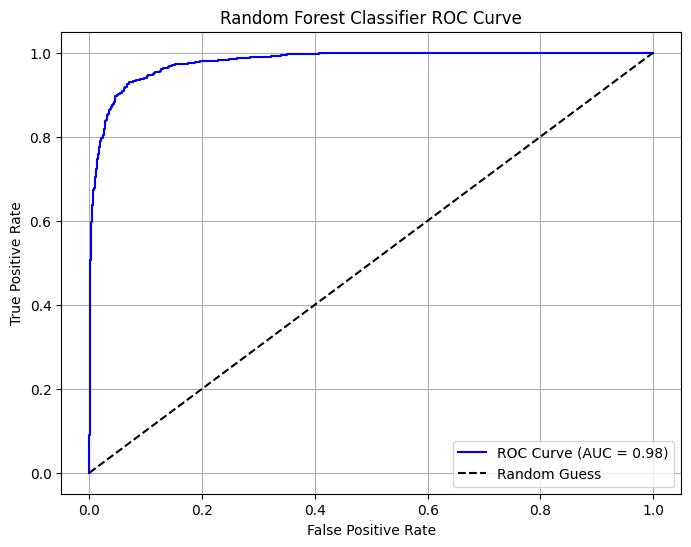

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost Classifier Accuracy: 0.94 (CV Mean: 0.95)
AdaBoost Classifier AUC-ROC: 0.99


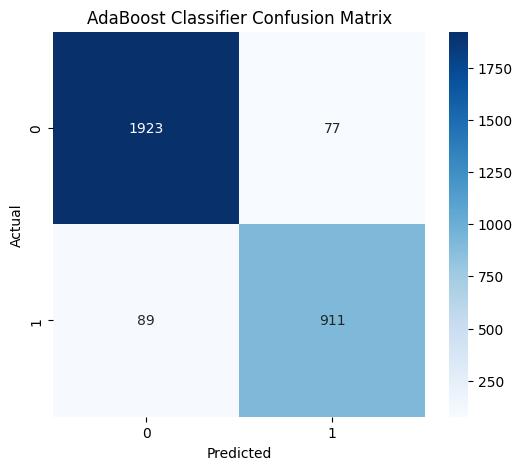

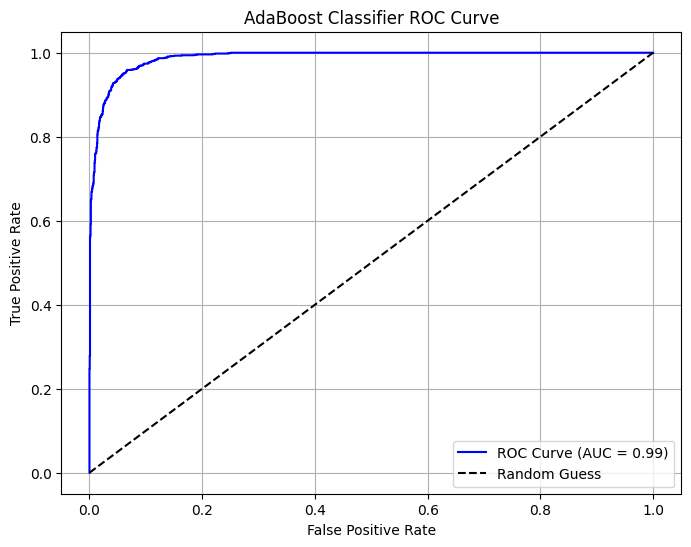

Decision Tree Classifier Accuracy: 0.89 (CV Mean: 0.89)
Decision Tree Classifier AUC-ROC: 0.94


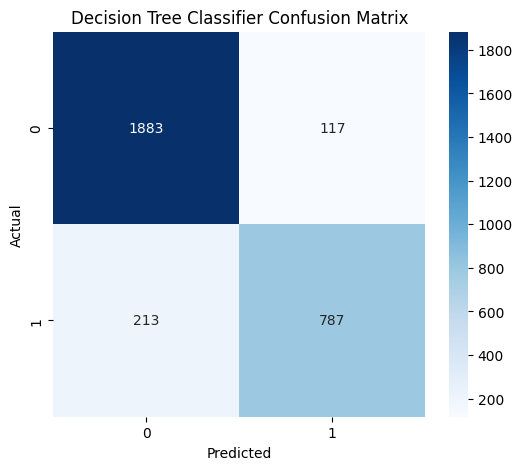

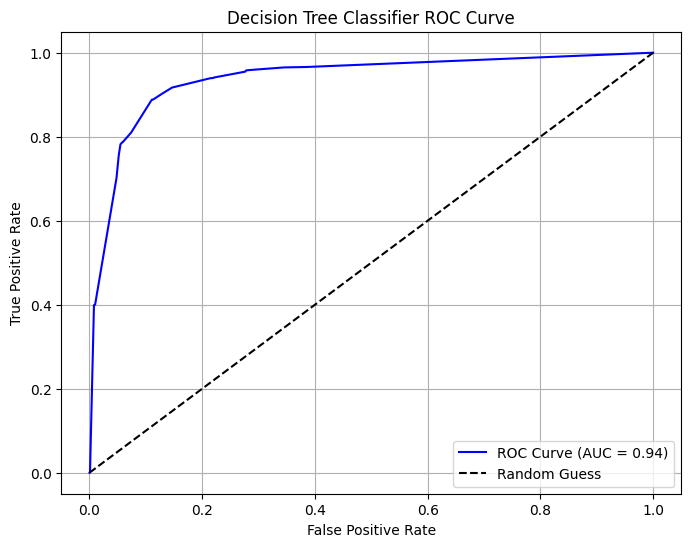

In [14]:
print("Classifier Techniques:")
for clf, name in classifiers:
    evaluate_classifier(clf, name)


In [15]:
# Model comparison table
print("\nComparison Table:")
comparison_metrics = []
for clf, name in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) if hasattr(clf, "predict_proba") else None
    comparison_metrics.append([name, accuracy, roc_auc])



Comparison Table:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:15:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 4000, number of negative: 8000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [16]:
comparison_df = pd.DataFrame(comparison_metrics, columns=["Model", "Accuracy", "AUC-ROC"])
display(comparison_df)

,Model,Accuracy,AUC-ROC
0,XGBoost Classifier,0.951333,0.990742
1,CatBoost Classifier,0.954667,0.991919
2,LightGBM Classifier,0.954667,0.990927
3,Random Forest Classifier,0.930333,0.979621
4,AdaBoost Classifier,0.944667,0.988101
5,Decision Tree Classifier,0.890000,0.937835


In [17]:
# Gradient Boost Regression Techniques
print("\nGradient Boost Regression Techniques:")
regressors = [
    (XGBRegressor(n_estimators=100, random_state=42), "XGBoost Regressor"),
    (CatBoostRegressor(verbose=0, random_seed=42), "CatBoost Regressor"),
    (LGBMRegressor(random_state=42), "LightGBM Regressor")
]



Gradient Boost Regression Techniques:


XGBoost Regressor RMSE: 0.22, R2: 0.79


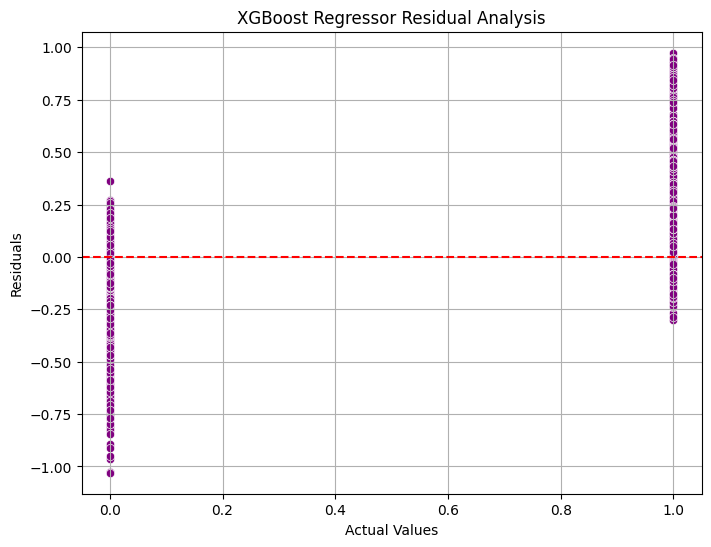

CatBoost Regressor RMSE: 0.21, R2: 0.81


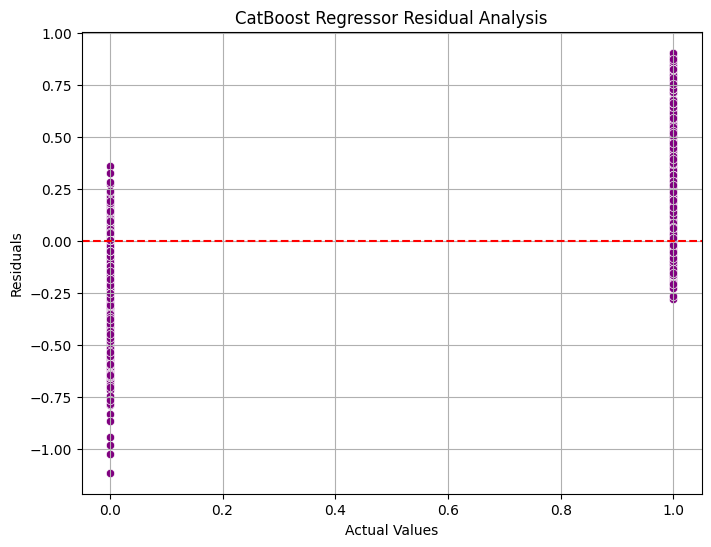

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 8
[LightGBM] [Info] Start training from score 0.333333
LightGBM Regressor RMSE: 0.21, R2: 0.81


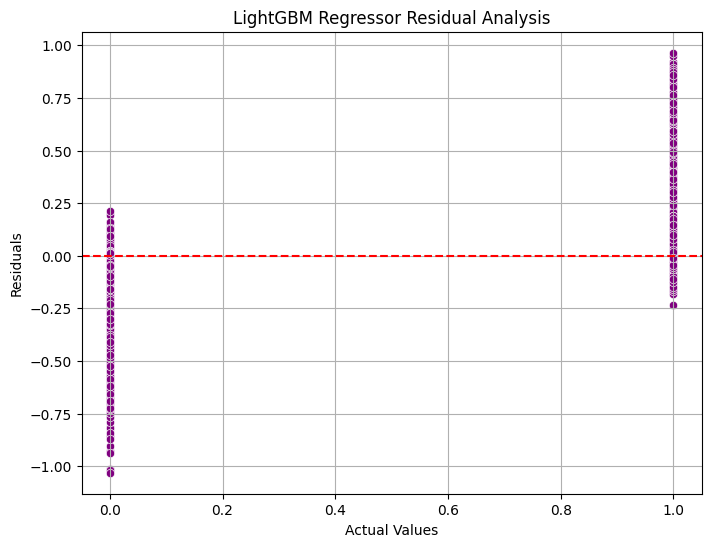

In [18]:
for reg, name in regressors:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} RMSE: {rmse:.2f}, R2: {r2:.2f}")

    # Residual Analysis
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=residuals, color="purple")
    plt.axhline(0, color="red", linestyle="--")
    plt.title(f"{name} Residual Analysis")
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals")
    plt.grid()
    plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:15:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


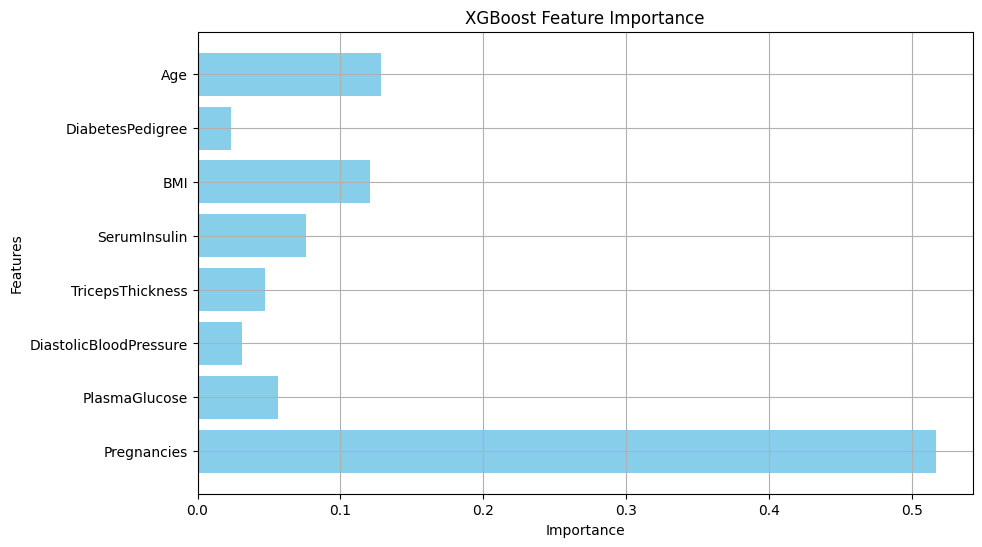

In [19]:
# Feature Importance for XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_clf.fit(X_train, y_train)
feature_importance = xgb_clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, color="skyblue")
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid()
plt.show()

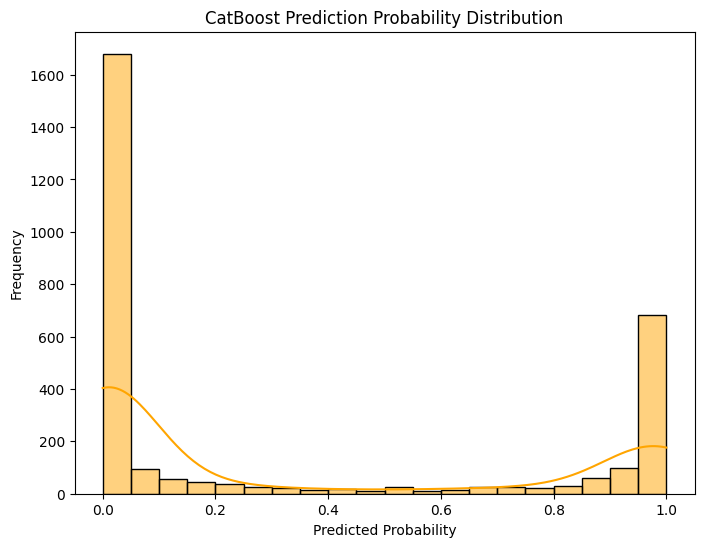

In [20]:
#  Prediction Probability Distribution for CatBoost
cat_clf = CatBoostClassifier(verbose=0, random_seed=42)
cat_clf.fit(X_train, y_train)
y_prob = cat_clf.predict_proba(X_test)[:, 1]
plt.figure(figsize=(8, 6))
sns.histplot(y_prob, kde=True, bins=20, color="orange")
plt.title("CatBoost Prediction Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:17:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:17:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:17:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:17:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:17:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

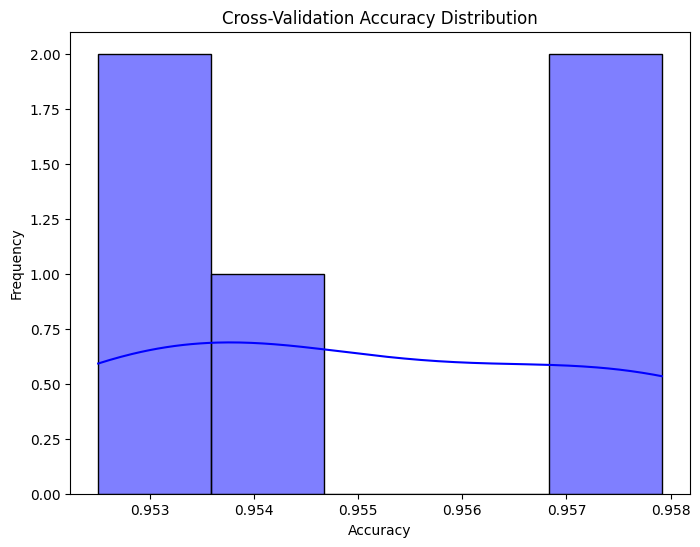

In [24]:
# Cross-validation Accuracy Distribution
plt.figure(figsize=(8, 6))
cv_scores = cross_val_score(XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
                            X_train, y_train, cv=5)
sns.histplot(cv_scores, kde=True, bins=5, color="blue")
plt.title("Cross-Validation Accuracy Distribution")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()

In [25]:
# Import necessary libraries
from sklearn.datasets import make_regression


In [26]:
# Generate synthetic ranking data
X, y = make_regression(n_samples=1000, n_features=8, noise=0.1, random_state=42)
groups = np.random.randint(1, 11, size=len(X))  # Randomly assign groups for ranking tasks

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Function to evaluate ranking models
def evaluate_ranker(model, model_name):
    model.fit(X_train, y_train, group=groups[:len(X_train)] if "group" in dir(model) else None)
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}, R2: {r2:.2f}")

    # Actual vs Predicted
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, color="purple")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid()
    plt.show()

XGBoost Ranker RMSE: 168.15, R2: 0.03


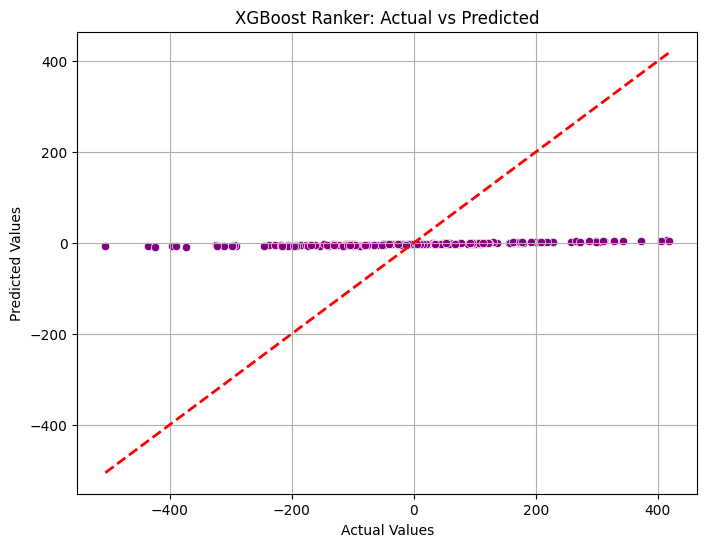

In [34]:
# Sort the data by qid
train_data = pd.DataFrame(X_train, columns=[f"feature_{i}" for i in range(X_train.shape[1])])
train_data["y"] = y_train
train_data["qid"] = qid_train
train_data = train_data.sort_values(by="qid")

test_data = pd.DataFrame(X_test, columns=[f"feature_{i}" for i in range(X_test.shape[1])])
test_data["y"] = y_test
test_data["qid"] = qid_test
test_data = test_data.sort_values(by="qid")

# Extract sorted data
X_train_sorted = train_data.drop(columns=["y", "qid"]).values
y_train_sorted = train_data["y"].values
qid_train_sorted = train_data["qid"].values

X_test_sorted = test_data.drop(columns=["y", "qid"]).values
y_test_sorted = test_data["y"].values
qid_test_sorted = test_data["qid"].values

# XGBoost Ranker
xgb_ranker = XGBRanker(objective="rank:pairwise", n_estimators=100, random_state=42)

# Train and evaluate the ranker
xgb_ranker.fit(
    X_train_sorted,
    y_train_sorted,
    qid=qid_train_sorted
)

# Predictions
y_pred = xgb_ranker.predict(X_test_sorted)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_sorted, y_pred))
r2 = r2_score(y_test_sorted, y_pred)
print(f"XGBoost Ranker RMSE: {rmse:.2f}, R2: {r2:.2f}")

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_sorted, y=y_pred, color="purple")
plt.plot([y_test_sorted.min(), y_test_sorted.max()], [y_test_sorted.min(), y_test_sorted.max()], "r--", lw=2)
plt.title("XGBoost Ranker: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()


CatBoost Regressor (Fallback for Ranking) RMSE: 0.21, R2: 0.81


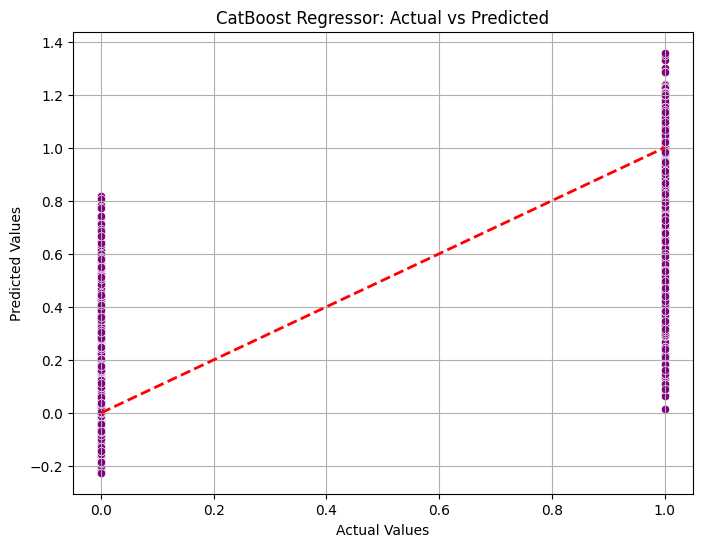

In [41]:
from catboost import CatBoostRegressor

# CatBoost Regressor as an alternative for ranking
cat_regressor = CatBoostRegressor(verbose=0, iterations=100, random_seed=42)

# Fit and evaluate the regressor
cat_regressor.fit(X_train_sorted, y_train_sorted)
y_pred = cat_regressor.predict(X_test_sorted)

# Evaluate the regressor
rmse = np.sqrt(mean_squared_error(y_test_sorted, y_pred))
r2 = r2_score(y_test_sorted, y_pred)
print(f"CatBoost Regressor (Fallback for Ranking) RMSE: {rmse:.2f}, R2: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_sorted, y=y_pred, color="purple")
plt.plot([y_test_sorted.min(), y_test_sorted.max()], [y_test_sorted.min(), y_test_sorted.max()], "r--", lw=2)
plt.title("CatBoost Regressor: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 8
[LightGBM] [Info] Start training from score 0.334500
LightGBM Regressor (Fallback for Ranking) RMSE: 0.21, R2: 0.80


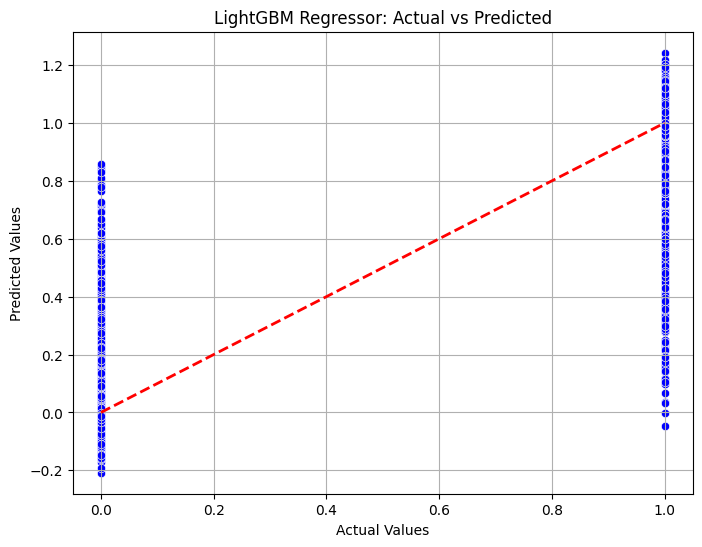

In [43]:
from lightgbm import LGBMRegressor

# LightGBM Regressor as a fallback for ranking tasks
lgb_regressor = LGBMRegressor(random_state=42, n_estimators=100)

# Fit the regressor
lgb_regressor.fit(X_train_sorted, y_train_sorted)

# Predictions
y_pred = lgb_regressor.predict(X_test_sorted)

# Evaluate the regressor
rmse = np.sqrt(mean_squared_error(y_test_sorted, y_pred))
r2 = r2_score(y_test_sorted, y_pred)
print(f"LightGBM Regressor (Fallback for Ranking) RMSE: {rmse:.2f}, R2: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_sorted, y=y_pred, color="blue")
plt.plot([y_test_sorted.min(), y_test_sorted.max()], [y_test_sorted.min(), y_test_sorted.max()], "r--", lw=2)
plt.title("LightGBM Regressor: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()